## Anomoly Detection
### Continuous Probabilistic Methods

In [1]:
# imports
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

import explore

Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
# This function will work on a single column

def get_lower_and_upper_bounds(df, col, k=1.5):
    '''
    This function takes in a dataframe and returns the upper and lower bounds based on the argument of k
    '''
    # Find the lower and upper quartiles
    q_25, q_75 = df[col].quantile([0.25, 0.75])
    # Find the Inner Quartile Range
    q_iqr = q_75 - q_25
    # Find the Upper Bound
    q_upper = q_75 + (k * q_iqr)
    # Find the Lower Bound
    q_lower = q_25 - (k * q_iqr)
    # Identify outliers
    outliers = df[df[col] < q_lower]
    outliers = df[df[col] > q_upper]
    
    return q_lower, q_upper, outliers

In [3]:
# This function will take in an entire dataframe, and operate on a lit of columns...

def get_low_and_up_bounds_df(df, k=1.5, sort_values=False):
    '''
    This function takes in a pandas dataframe, list of columns, and k value, and will print out upper and lower bounds for each column.
    It takes in a default argument of the col_list being all numeric columns, and the k value=1.5
    '''
    col_list=list(df.select_dtypes(include=['int', 'float'], exclude='O'))
    
    if sort_values == False:
                                   
        for col in col_list:

            # Find the lower and upper quartiles
            q_25, q_75 = df[col].quantile([0.25, 0.75])
            # Find the Inner Quartile Range
            q_iqr = q_75 - q_25
            # Find the Upper Bound
            q_upper = q_75 + (k * q_iqr)
            # Find the Lower Bound
            q_lower = q_25 - (k * q_iqr)
            # Identify outliers
            outliers_lower = df[df[col] < q_lower]
            outliers_upper = df[df[col] > q_upper]
            outliers_all = pd.concat([outliers_lower, outliers_upper], axis=0)
            
            print('')
            print(col)
            print(f'K: {k}')
            print(f'Lower Fence: {q_lower}')
            print(f'Upper Fence: {q_upper}')
            print('')
            print(f'Lower Outliers in {col}')
            print('')
            print(outliers_lower)
            print('')
            print(f'Upper Outliers in {col}')
            print('')
            print(outliers_upper)
            print('')
            print(f'All Outliers in {col}')
            print('')
            print(outliers_all)
            plt.figure(figsize=(16,4))
            plt.subplot(1, 2, 1)
            sns.histplot(data = df, x = col, kde=True)
            plt.title(col)
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col], data=df, whis=k)
            plt.title(col)
            plt.show()
            print('-------------------------------------------------------------------')
            
    else:
        
        for col in col_list:

            # Find the lower and upper quartiles
            q_25, q_75 = df[col].quantile([0.25, 0.75])
            # Find the Inner Quartile Range
            q_iqr = q_75 - q_25
            # Find the Upper Bound
            q_upper = q_75 + (k * q_iqr)
            # Find the Lower Bound
            q_lower = q_25 - (k * q_iqr)
            # Identify outliers
            outliers_lower = df[df[col] < q_lower].sort_values(by=col)
            outliers_upper = df[df[col] > q_upper].sort_values(by=col)
            outliers_all = pd.concat([outliers_lower, outliers_upper], axis=0).sort_values(by=col)

            print('')
            print(col)
            print(f'K: {k}')
            print(f'Lower Fence: {q_lower}')
            print(f'Upper Fence: {q_upper}')
            print('')
            print(f'Lower Outliers in {col}')
            print('')
            print(outliers_lower)
            print('')
            print(f'Upper Outliers in {col}')
            print('')
            print(outliers_upper)
            print('')
            print(f'All Outliers in {col}')
            print('')
            print(outliers_all)
            plt.figure(figsize=(16,4))
            plt.subplot(1, 2, 1)
            sns.histplot(data = df, x = col, kde=True)
            plt.title(col)
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col], data=df, whis=k)
            plt.title(col)
            plt.show()
            print('-------------------------------------------------------------------')

        

1. Using lemonade.csv dataset and focusing on continuous variables:

In [4]:
df = pd.read_csv('lemonade.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB



Temperature
K: 1.5
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Lower Outliers in Temperature

         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7

Upper Outliers in Temperature

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21

All Outliers in Temperature

         Date       Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17    Sunday         15.1      2.50       9    0.5      7
41    2/11/17  Saturday        212.0      0.91      35    0.5     21


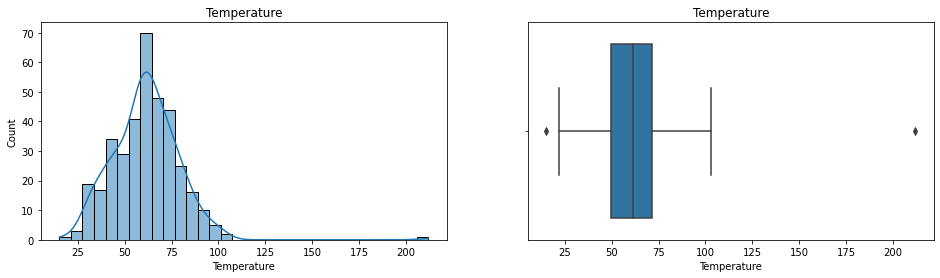

-------------------------------------------------------------------

Rainfall
K: 1.5
Lower Fence: 0.26
Upper Fence: 1.3

Lower Outliers in Rainfall

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Rainfall

         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
28    1/29/17     Sunday         35.2      1.33      27    0.5     14
354  12/21/17   Thursday         40.5      1.33      23    0.5     15
350  12/17/17     Sunday         32.2      1.33      16    0.5     14
345  12/12/17    Tuesday         33.5      1.33      22    0.5     15
12    1/13/17     Friday         37.5      1.33      19    0.5     15
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
27    1/28/17   Saturday         34.9      1.33      15    0.5     13
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
342   12/9/17   Saturday      

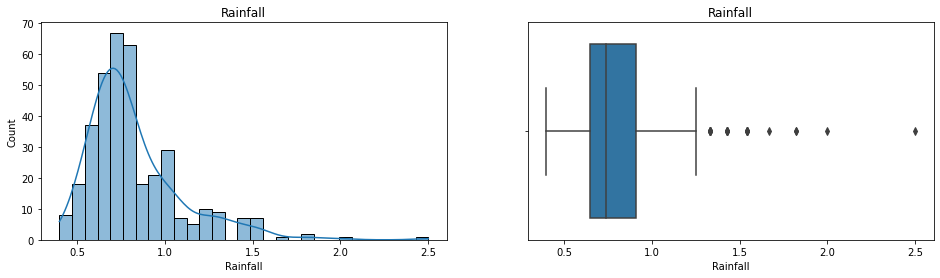

-------------------------------------------------------------------

Flyers
K: 1.5
Lower Fence: 4.0
Upper Fence: 76.0

Lower Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20

Upper Outliers in Flyers

        Date     Day  Temperature  Rainfall  Flyers  Price  Sales
166  6/16/17  Friday         99.3      0.47      77    0.5     41
194  7/14/17  Friday         92.0      0.50      80    0.5     40

All Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
166   6/16/17   Friday         99.3      0.47      77    0.5     41
194   7/14/17   Friday         92.0      0.50      80    0.5     40


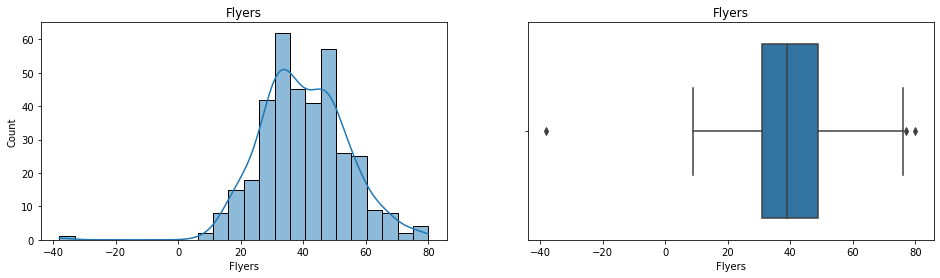

-------------------------------------------------------------------

Price
K: 1.5
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

All Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


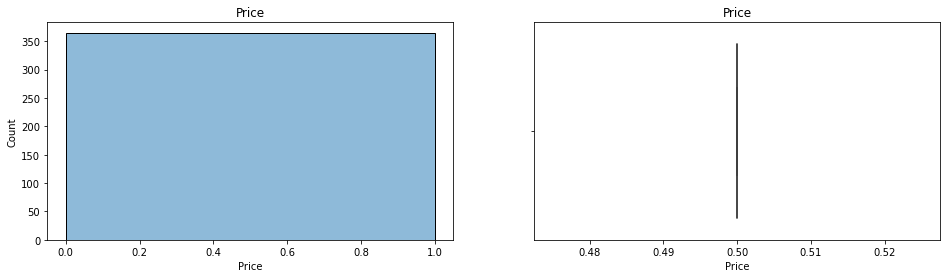

-------------------------------------------------------------------

Sales
K: 1.5
Lower Fence: 5.0
Upper Fence: 45.0

Lower Outliers in Sales

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534

All Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534


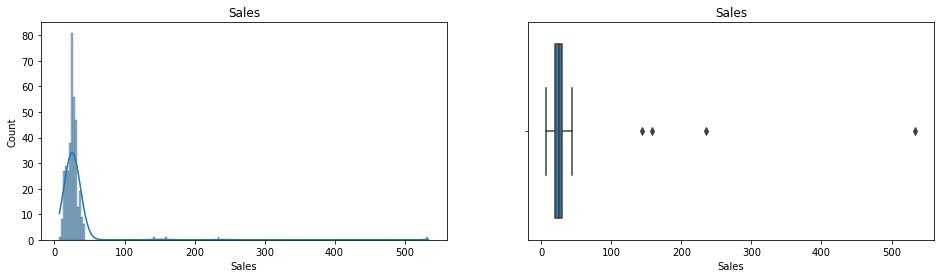

-------------------------------------------------------------------


In [6]:
get_low_and_up_bounds_df(df, sort_values=True)

1a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

#### Lower Outliers
#### Lower Outliers to Drop:
- Flyers: '-38' Cannot pass out a negative number of flyers, obviously a mistake
#### Other Lower Outliers:
- Temperature: '15.1' This seems valid to me, considering the time of year, and other temperatures in the dataset

1b. Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

#### Upper Outliers:
#### Upper Outliers to Drop:
- Temperature: '212.0' Cannot have a temperature = Boiling point, obviously a mistake
#### Other Upper Outliers:
- Rainfall: Numerous outliers, although none appear to be out of the question. I would recommended keeping them until further research is done, and/or more data becomes available
- Flyers: Two upper outliers, that are barely outside 1.5*IQR, and might be within limits once onvious mistake of -38 flyers is dropped from data
- Sales: Four outliers surrounding 4th of July Weekend. This would suggest to me that more were sold than a typical day. Probably multiple neighborhood events going on. I would recommend keeping this data

1c. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?


Temperature
K: 3
Lower Fence: -16.299999999999997
Upper Fence: 137.7

Lower Outliers in Temperature

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Temperature

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21

All Outliers in Temperature

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21


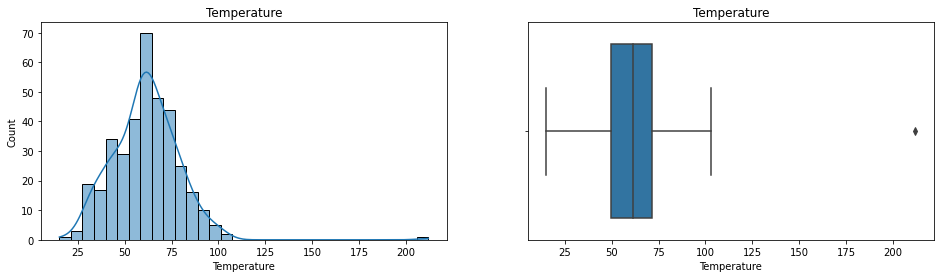

-------------------------------------------------------------------

Rainfall
K: 3
Lower Fence: -0.13
Upper Fence: 1.69

Lower Outliers in Rainfall

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Rainfall

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
364  12/31/17   Sunday         15.1      2.50       9    0.5      7

All Outliers in Rainfall

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
364  12/31/17   Sunday         15.1      2.50       9    0.5      7


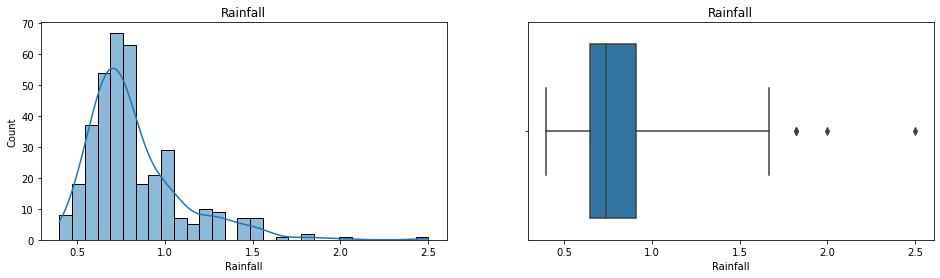

-------------------------------------------------------------------

Flyers
K: 3
Lower Fence: -23.0
Upper Fence: 103.0

Lower Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20

Upper Outliers in Flyers

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

All Outliers in Flyers

         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20


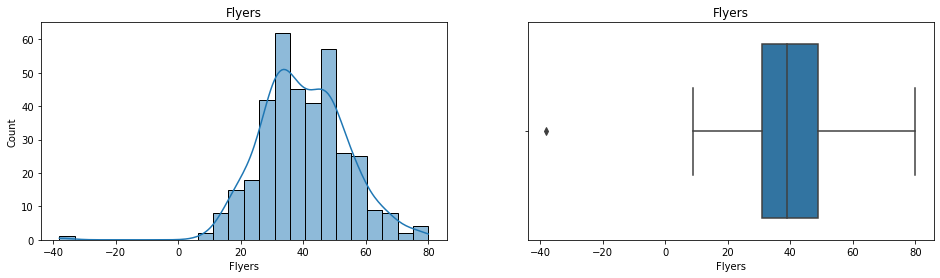

-------------------------------------------------------------------

Price
K: 3
Lower Fence: 0.5
Upper Fence: 0.5

Lower Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

All Outliers in Price

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


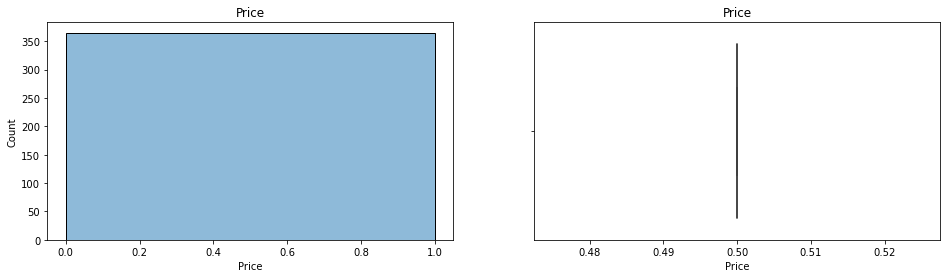

-------------------------------------------------------------------

Sales
K: 3
Lower Fence: -10.0
Upper Fence: 60.0

Lower Outliers in Sales

Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Upper Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534

All Outliers in Sales

       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0.54      68    0.5    235
184  7/4/17   Tuesday         84.2      0.59      49    0.5    534


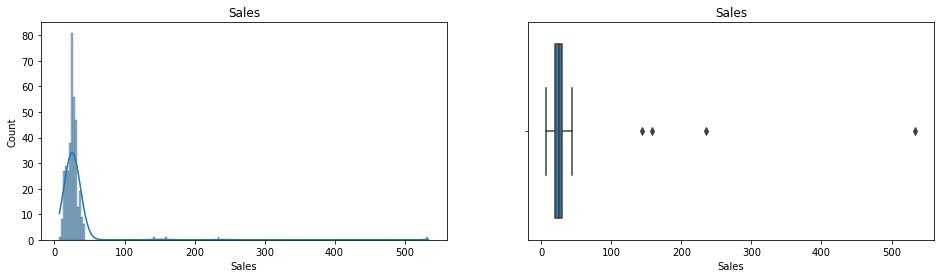

-------------------------------------------------------------------


In [7]:
get_low_and_up_bounds_df(df, sort_values=True, k=3)

#### Lower Outliers
#### Lower Outliers to Drop:
- Flyers: '-38' Cannot pass out a negative number of flyers, obviously a mistake
#### Other Lower Outliers:
- None

1d. Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

#### Upper Outliers:
#### Upper Outliers to Drop:
- Temperature: '212.0' Cannot have a temperature = Boiling point, obviously a mistake
#### Other Upper Outliers:
- Rainfall: Numerous outliers, although none appear to be out of the question. I would recommended keeping them until further research is done, and/or more data becomes available
- Sales: Four outliers surrounding 4th of July Weekend. This would suggest to me that more were sold than a typical day. Probably multiple neighborhood events going on. I would recommend keeping this data

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

In [8]:
# Let's write a function to test for normality in variable distribution...
#  first we need to import shapiro
from scipy.stats import shapiro

In [9]:
def check_shapiro(df, alpha=0.05):
    '''
    This function will take in a dataframe, and test each numerical column for normality of variable distribution.
    '''
    # Selecting all numeric columns, and omitting object cols
    # Only need to do one or the other, this is redundant
    col_list=list(df.select_dtypes(include=['int', 'float'], exclude='O'))
    
    for col in col_list:
        data = df[col]
        stat, p = shapiro(data)
        print(col)
        print('')
        print('stat=%.4f, p=%.4f\n' % (stat, p))
        if p > alpha:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')
        print('')
        print('---------------------------------')

In [10]:
check_shapiro(df)

Temperature

stat=0.9153, p=0.0000

Probably not Gaussian

---------------------------------
Rainfall

stat=0.8509, p=0.0000

Probably not Gaussian

---------------------------------
Flyers

stat=0.9747, p=0.0000

Probably not Gaussian

---------------------------------
Price

stat=1.0000, p=1.0000

Probably Gaussian

---------------------------------
Sales

stat=0.2065, p=0.0000

Probably not Gaussian

---------------------------------


/opt/homebrew/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [11]:
# Now let's bring in normaltest to loo at skewness...
from scipy.stats import normaltest

In [12]:
def check_normal(df, alpha=0.05):
    '''
    This function will take in a dataframe, and test each numerical column for normality of variable distribution.
    '''
    # Selecting all numeric columns, and omitting object cols
    # Only need to do one or the other, this is redundant
    col_list=list(df.select_dtypes(include=['int', 'float'], exclude='O'))
    
    for col in col_list:
        data = df[col]
        stat, p = normaltest(data)
        print(col)
        print('')
        print('stat=%.4f, p=%.4f\n' % (stat, p))
        if p > alpha:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')
        print('')
        print('---------------------------------')

In [13]:
check_normal(df)

Temperature

stat=167.8560, p=0.0000

Probably not Gaussian

---------------------------------
Rainfall

stat=152.0786, p=0.0000

Probably not Gaussian

---------------------------------
Flyers

stat=25.2035, p=0.0000

Probably not Gaussian

---------------------------------
Price

stat=1135.8322, p=0.0000

Probably not Gaussian

---------------------------------
Sales

stat=727.0324, p=0.0000

Probably not Gaussian

---------------------------------


In [14]:
# first let's create zscore columns for each variable
explore.add_zscore_cols(df)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,NaN,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,NaN,-0.415720
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,NaN,-0.351096
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,NaN,-0.318783
...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19,-1.024260,0.635391,-0.515297,NaN,-0.286471
361,12/28/17,Thursday,37.8,1.25,32,0.5,16,-1.295189,1.548165,-0.587832,NaN,-0.383408
362,12/29/17,Friday,39.5,1.25,17,0.5,15,-1.201194,1.548165,-1.675857,NaN,-0.415720
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,-1.676702,2.205363,-1.313182,NaN,-0.480344


2a. Use a 2 sigma decision rule to isolate the outliers.

2b. Do these make sense?

2c. Should certain outliers be kept or removed?

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

### Function Testing


Temperature

K: 1.5
IQR: 22.0
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Temperature Lower Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


Temperature Upper Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


Temperature All Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


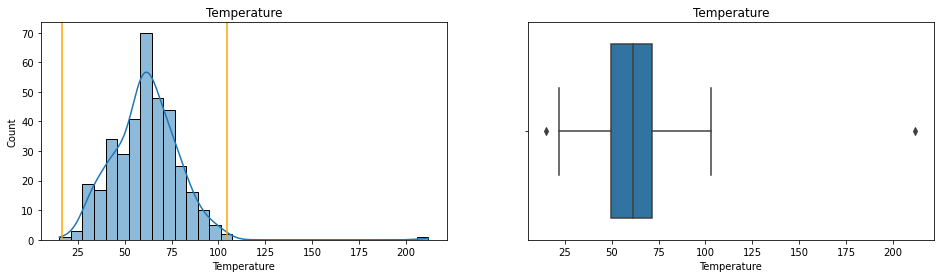

In [14]:
explore.get_plot_iqr_stats(df, 'Temperature')


Temperature

K: 1.5
IQR: 22.0
Lower Fence: 16.700000000000003
Upper Fence: 104.7

Temperature Lower Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


Temperature Upper Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


Temperature All Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


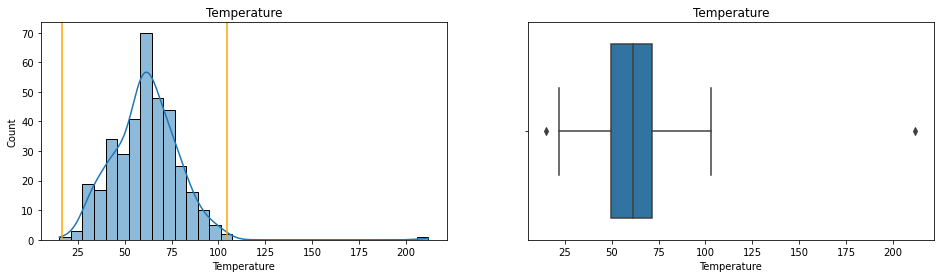


Rainfall

K: 1.5
IQR: 0.26
Lower Fence: 0.26
Upper Fence: 1.3

Rainfall Lower Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Rainfall Upper Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


Rainfall All Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


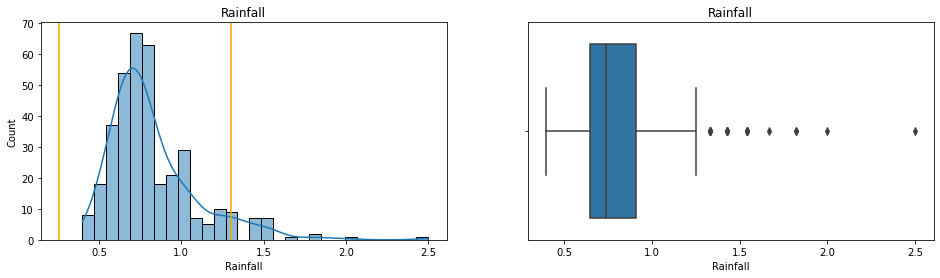


Flyers

K: 1.5
IQR: 18.0
Lower Fence: 4.0
Upper Fence: 76.0

Flyers Lower Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


Flyers Upper Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


Flyers All Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


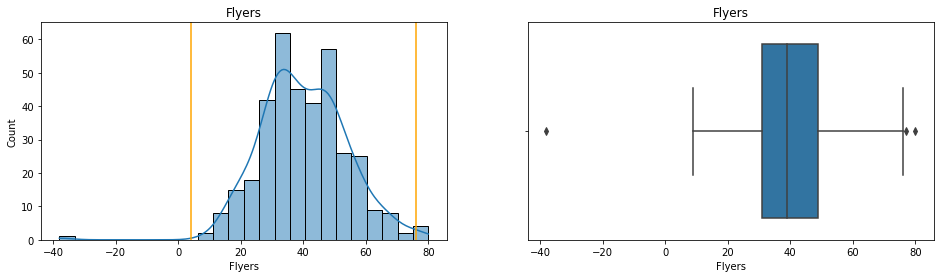


Price

K: 1.5
IQR: 0.0
Lower Fence: 0.5
Upper Fence: 0.5

Price Lower Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Price Upper Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Price All Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


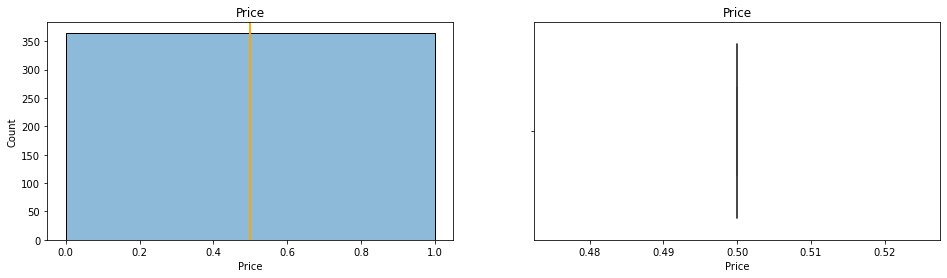


Sales

K: 1.5
IQR: 10.0
Lower Fence: 5.0
Upper Fence: 45.0

Sales Lower Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Sales Upper Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


Sales All Outliers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


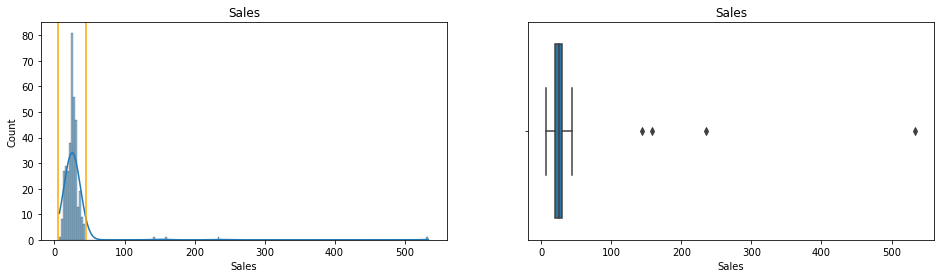

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [15]:
explore.whole_df_iqr(df)

In [16]:
explore.add_zscore_cols(df)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Price_zscore,Sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,NaN,-0.577281
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,NaN,-0.480344
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,NaN,-0.415720
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,NaN,-0.351096
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,NaN,-0.318783
...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19,-1.024260,0.635391,-0.515297,NaN,-0.286471
361,12/28/17,Thursday,37.8,1.25,32,0.5,16,-1.295189,1.548165,-0.587832,NaN,-0.383408
362,12/29/17,Friday,39.5,1.25,17,0.5,15,-1.201194,1.548165,-1.675857,NaN,-0.415720
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,-1.676702,2.205363,-1.313182,NaN,-0.480344


In [19]:
# Xavier's function - need to dive deeper
def get_sigma_percent(df, col, step = 1):
    return len(df.loc[(df[col] < df[col].mean() + df[col].std()) & (df[col] > df[col].mean() - df[col].std())]) / len(df)